<a href="https://colab.research.google.com/github/Navjotkhatri/Productionization_of_ML_Systems_in_Travel_Industry/blob/main/Gender_Classification_Model_Productionization_of_ML_Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Classification

> Add blockquote


##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import random
from google.colab import drive
import matplotlib.pyplot as plt
import scipy.stats as stats


import warnings
warnings.filterwarnings("ignore")


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC

## Importing essential libraries to check the accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
users_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Specialisation Track/Model-1 Productionization of ML Systems/CapstoneProject_Travel_Package/traveldata/users.csv")

### Dataset First View

In [ ]:
# Dataset First Look
users_df.head()

,code,company,name,gender,age
0,0,4You,Roy Braun,male,21
1,1,4You,Joseph Holsten,male,37
2,2,4You,Wilma Mcinnis,female,48
3,3,4You,Paula Daniel,female,23
4,4,4You,Patricia Carson,female,44


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
users_df.shape

(1340, 5)

### Dataset Information

In [ ]:
# Dataset Info
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   code     1340 non-null   int64 
 1   company  1340 non-null   object
 2   name     1340 non-null   object
 3   gender   1340 non-null   object
 4   age      1340 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 52.5+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
users_df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
users_df.isnull().sum()

,0
code,0
company,0
name,0
gender,0
age,0


<Axes: >

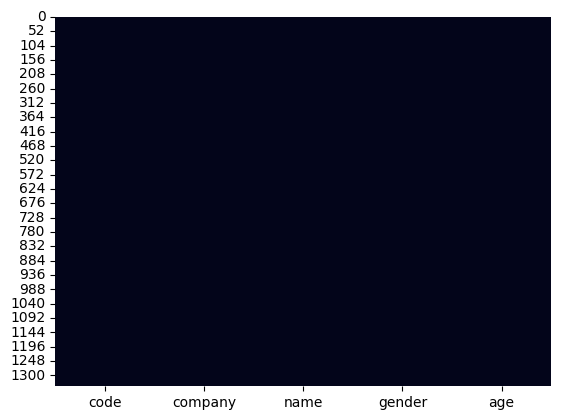

In [ ]:
# Visualizing the missing values
sns.heatmap(users_df.isnull(), cbar=False)

### What did you know about your dataset?

*I have a user dataset consisting of 1,340 rows and 5 columns like code, company, name, age, and gender. The data is clean, with no duplicate or null values.*

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
users_df.columns

Index(['code', 'company', 'name', 'gender', 'age'], dtype='object')

In [ ]:
# Dataset Describe
users_df.describe()

,code,age
count,1340.000000,1340.000000
mean,669.500000,42.742537
std,386.968991,12.869779
min,0.000000,21.000000
25%,334.750000,32.000000
50%,669.500000,42.000000
75%,1004.250000,54.000000
max,1339.000000,65.000000


### Variables Description

**Users Dataset:**

code: User identifier.

company: Associated company.

name: Name of the user.

gender: Gender of the user.

age: Age of the user.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
users_df.nunique()

,0
code,1340
company,5
name,1338
gender,3
age,45


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
users_df['gender'].value_counts()

,count
gender,
male,452
female,448
none,440


In [ ]:
users_df['company'].value_counts()

,count
company,
4You,453
Acme Factory,261
Wonka Company,237
Monsters CYA,195
Umbrella LTDA,194


In [ ]:
users_df['gender'] = users_df['gender'].replace({'none': 'others'})

In [ ]:
users_df['gender'].value_counts()

,count
gender,
male,452
female,448
others,440


### What all manipulations have you done and insights you found?

*My dataset includes five distinct companies: 4you, Acme Factory, Wonka Company, Monsters CYA, and Umbrella LTDA. The gender categories initially included male, female, and none. I have converted the 'none' gender category to 'others'.*

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Bar chart

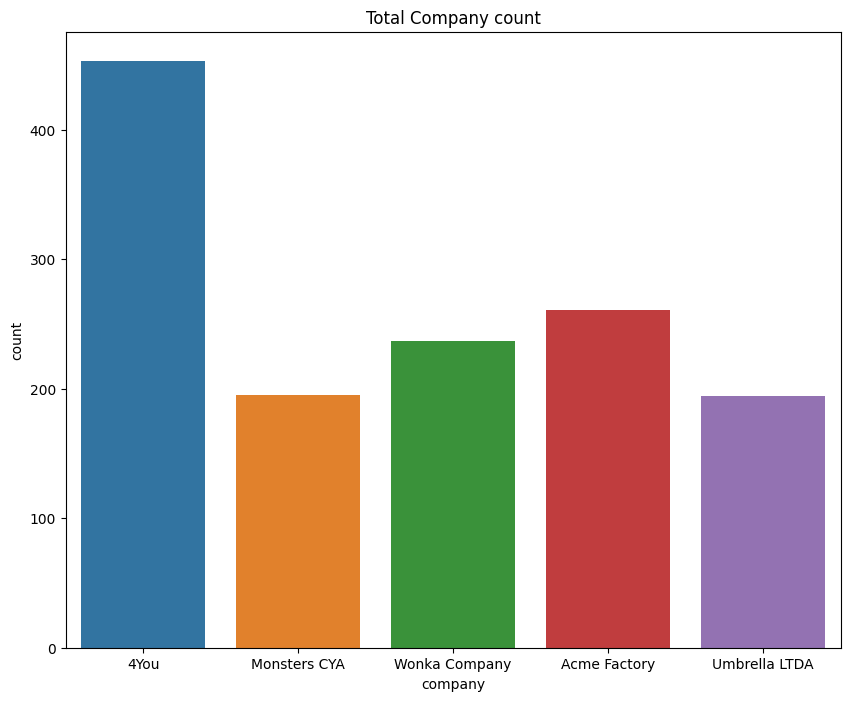

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(10,8))
sns.countplot(x=users_df['company'], hue=users_df['company'])
plt.title('Total Company count')
plt.show()

##### 1. Why did you pick the specific chart?

*I used a bar chart to visualize the count of each company in the dataset. Bar charts are effective for displaying categories and their distinct counts.*

##### 2. What is/are the insight(s) found from the chart?

*The bar chart reveals that the company '4you' has the highest user count, indicating it has the most users. Conversely, 'Monsters CYA' has the lowest user count, indicating it has the fewest users.*

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*Yes, the gained insights can help create a positive business impact. Understanding that '4you' has the highest user count allows the company to identify what they are doing well and leverage those strategies across other companies. This insight can also help in resource allocation, customer engagement, and targeted marketing efforts to maintain and grow the user base.*

*On the other hand, the insight that 'Monsters CYA' has the lowest user count could indicate areas needing improvement. This doesn't necessarily lead to negative growth but highlights opportunities for growth.*

#### Chart - 2 pie chart

In [ ]:
company_count=users_df['company'].value_counts()

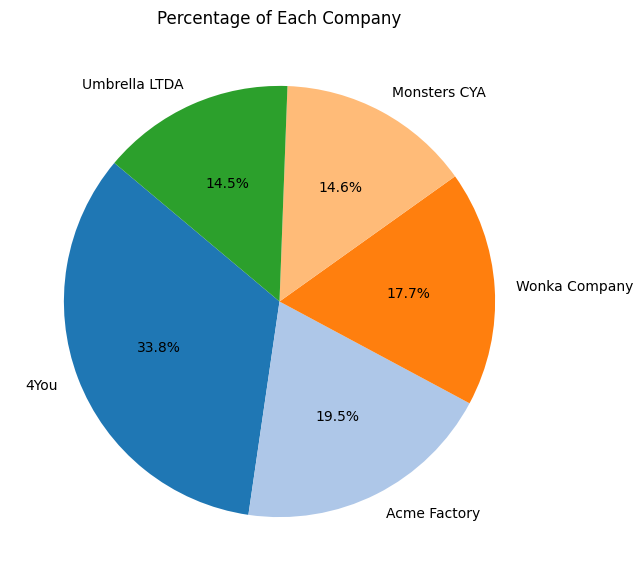

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(10, 7))
plt.pie(company_count, labels=company_count.index,autopct='%1.1f%%',  startangle=140,colors=plt.get_cmap('tab20').colors)
plt.title('Percentage of Each Company')
plt.show()

##### 1. Why did you pick the specific chart?

*I used a pie chart to display the percentage distribution of companies within the dataset. Pie charts are effective for visualizing comparisons and percentage shares of the whole.*

##### 2. What is/are the insight(s) found from the chart?

*The pie chart visualization shows that '4you' company has the largest share at approximately 33%, followed by 'Acme Factory' at 19.5%. 'Umbrella LTDA' has the smallest share, with only around 14%.*

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

**Targeted Marketing Strategies:** *Knowing that '4you' holds the largest share (33%) of flight bookings suggests that this company effectively attracts customers. Airlines and travel agencies can analyze the strategies and offerings of '4you' to replicate its success across other companies.*

**Resource Allocation:** *'Acme Factory' accounts for 19.5% of the bookings, indicating a strong presence in the market. Airlines can allocate resources to maintain and expand this customer base, ensuring continued growth and loyalty from these users.*

**Identifying Opportunities for Growth:** *The smallest share (14%) held by 'Umbrella LTDA' highlights an area for potential growth. Airlines and travel agencies can investigate why 'Umbrella LTDA' has fewer bookings and develop targeted initiatives to attract more customers from this company, such as tailored promotions or improved service offerings.*

**Potential Negative Insights:**

**Over-Reliance on a Single Source:** *With '4you' representing a significant portion of the bookings, there's a risk of over-reliance on this company. Any negative changes affecting '4you' could have a substantial impact on overall booking numbers. Diversifying the customer base by attracting users from other companies can mitigate this risk.*

**Underperformance of Certain Companies:** *The lower share of bookings from 'Umbrella LTDA' might indicate issues such as lesser market penetration, lower customer satisfaction, or ineffective marketing strategies. Addressing these issues is crucial to prevent stagnation or decline in bookings from this segment.*

#### Chart - 3 Bar chart

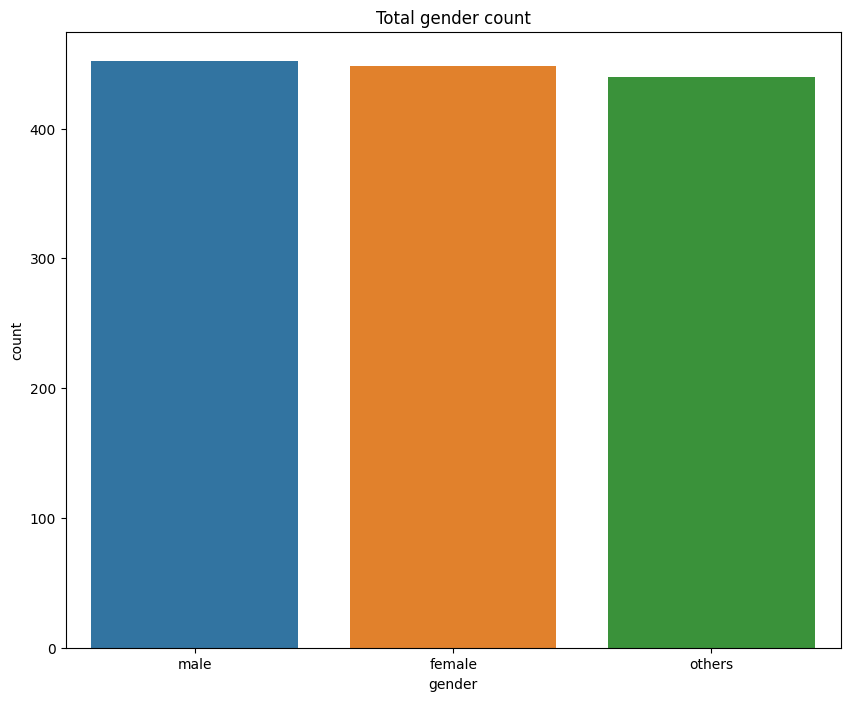

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(10,8))
sns.countplot(x=users_df['gender'], hue=users_df['gender'])
plt.title('Total gender count')
plt.show()

##### 1. Why did you pick the specific chart?

*I used a bar chart to visualize the count of each gender in the dataset. Bar charts are more effective for displaying categorical data.*

##### 2. What is/are the insight(s) found from the chart?

*The bar chart visualization shows that the dataset includes three distinct genders: male, female, and others. All three categories have similar counts, with nearly 500 entries each.*

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

**Balanced Marketing Strategies:** *Since the counts for male, female, and others are nearly equal, businesses can develop balanced marketing strategies that cater to all genders without bias. This ensures inclusivity and maximizes reach across all user segments.*

**Product and Service Customization:** *Understanding that all genders are almost equally represented allows companies to tailor their products and services to meet the needs of a diverse customer base, enhancing user satisfaction and loyalty*.

**Inclusivity and Brand Image:** *Highlighting the equal representation of all genders in the user base can positively impact the company's brand image, showcasing a commitment to diversity and inclusivity. This can attract a broader audience and improve customer trust and loyalty.*

**Potential Negative Insights:**

**Overgeneralization Risk:** *While the counts are nearly equal, there may be underlying differences in preferences and behaviors among the genders. Overgeneralizing based on the similar counts could lead to missed opportunities for targeted marketing and product development.*

**Resource Allocation Challenges:** *With equal representation, it may be challenging to allocate resources effectively if specific gender-based trends or demands are not thoroughly understood. This could result in less efficient marketing efforts or service offerings.*

#### Chart - 4 Pie chart

In [ ]:
gender_count= users_df['gender'].value_counts()
gender_count

,count
gender,
male,452
female,448
others,440


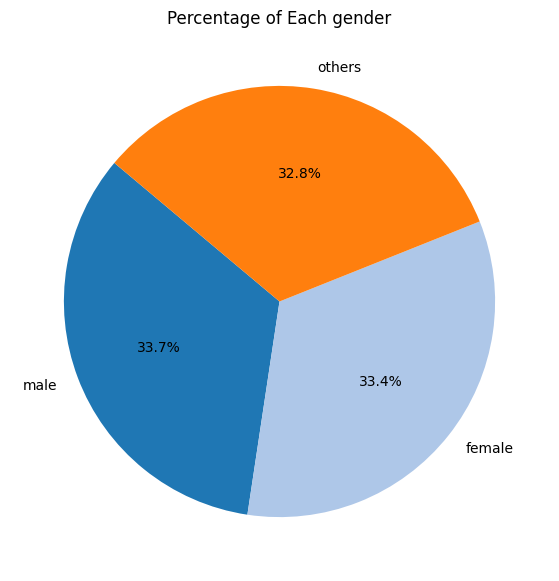

In [ ]:
plt.figure(figsize=(10, 7))
plt.pie(gender_count, labels=gender_count.index,autopct='%1.1f%%',  startangle=140,colors=plt.get_cmap('tab20').colors)
plt.title('Percentage of Each gender')
plt.show()

##### 1. Why did you pick the specific chart?

*I used a pie chart to showcase the percentage distribution of genders across the dataset. A pie chart effectively illustrates the proportional representation of each gender.*

##### 2. What is/are the insight(s) found from the chart?

*The pie chart shows that the gender distribution is nearly equal: males make up 33.7%, females account for 33.4%, and others represent 32.8%.*

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

**Balanced and Inclusive Strategies:** *The nearly equal distribution of genders (males at 33.7%, females at 33.4%, and others at 32.8%) allows businesses to design balanced and inclusive marketing and service strategies. This inclusivity can enhance customer satisfaction and loyalty across all gender groups.*

**Enhanced Customer Engagement:** *Recognizing the equal representation of genders provides an opportunity to tailor engagement efforts to each group, ensuring that marketing campaigns and services resonate well with all segments of the user base.*

**Diverse Product Development:** *With a balanced gender distribution, companies can develop diverse products and services that cater to the preferences of all genders, potentially leading to higher customer satisfaction and increased market share.*

**Potential Negative Insights:**

**Risk of Overgeneralization:** *Despite the nearly equal distribution, there may be significant differences in preferences, behaviors, and needs among the genders. Failing to recognize and address these differences can result in missed opportunities for targeted marketing and product development.*

**Resource Allocation Challenges:** *Equal representation may complicate resource allocation if specific gender-based trends are not identified and addressed. This could lead to less efficient marketing efforts or service offerings, impacting overall effectiveness.*

#### Chart - 5 Distplot

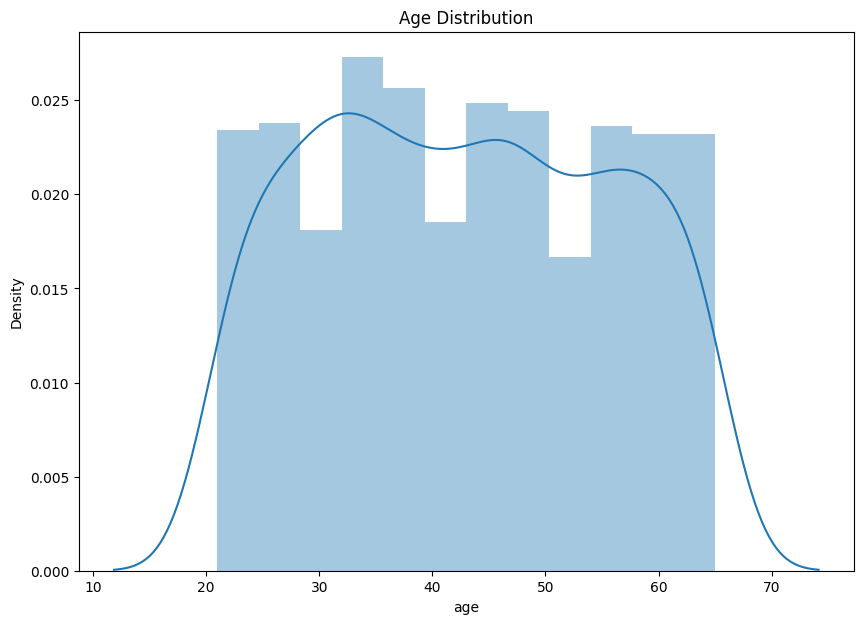

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(10, 7))
plt.title('Age Distribution')
sns.distplot(users_df['age'])
plt.show()

##### 1. Why did you pick the specific chart?

*I used a distplot to visualize the distribution of ages in the dataset. The distplot provides a comprehensive view of how age is distributed across the dataset*

##### 2. What is/are the insight(s) found from the chart?

*The distplot reveals that the age distribution is approximately normal, with ages ranging from a minimum of around 20 to a maximum of 65.*

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

**Targeted Marketing and Product Development:** *Understanding that the age distribution is approximately normal, with ages ranging from 20 to 65, allows businesses to tailor their marketing strategies and product offerings to suit a broad age range. This can enhance customer engagement and satisfaction across different age groups.*

**Diverse Customer Engagement:** *The wide age range indicates a diverse customer base. Companies can develop initiatives that appeal to various age segments, ensuring inclusivity and potentially increasing market share by addressing the needs and preferences of different age groups.*

**Strategic Planning:** *Knowledge of the age distribution helps in planning targeted campaigns, promotions, and services that resonate with the majority of the age demographic, optimizing resource allocation and improving overall effectiveness.*

**Potential Negative Insights:**

**Overlooking Specific Age Groups:** *Although the distribution is normal, focusing broadly on the entire age range might lead to overlooking specific needs or preferences of certain age segments. For example, younger or older age groups might have distinct requirements that are not adequately addressed by a one-size-fits-all approach.*

**Resource Allocation Challenges:** *The broad age range (20 to 65) might complicate resource allocation if specific age-based trends or preferences are not identified. Without targeting, marketing efforts and product development might not effectively address the unique needs of different age groups.*

#### Chart - 14 - Correlation Heatmap

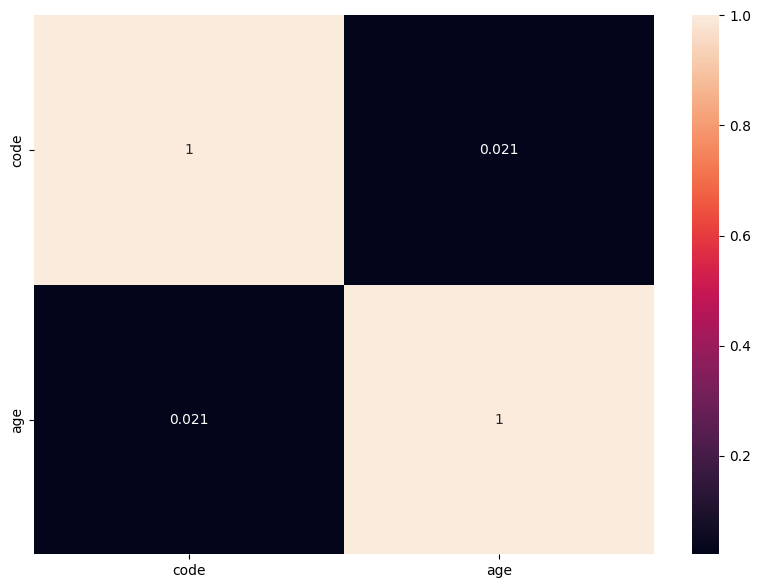

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10, 7))
sns.heatmap(abs(round(users_df.corr(numeric_only=True),3)), annot=True)
plt.show()

##### 1. Why did you pick the specific chart?

*I visualized the correlation between numerical values using a heatmap. The heatmap provides a comprehensive view of correlations with color coding and numerical values, making it easy to interpret the relationships between variables*

##### 2. What is/are the insight(s) found from the chart?

*The heatmap illustrates the relationship between 'code' and 'age.' Although there is no direct correlation between these variables, I included this visualization due to the limited number of variables available. As the heatmap shows, there is no strong relationship between 'code' and 'age.*

#### Chart - 15 - Pair Plot

<Figure size 1000x700 with 0 Axes>

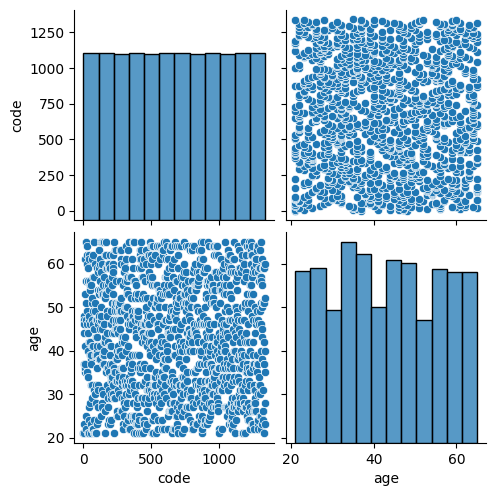

In [ ]:
# Pair Plot visualization code
plt.figure(figsize=(10, 7))
sns.pairplot(users_df)
plt.show()

##### 1. Why did you pick the specific chart?

*I used a pairplot to visualize the distribution of numerical variables. The pairplot provides an easy-to-interpret visualization of the relationships between data points.*

##### 2. What is/are the insight(s) found from the chart?

*From the pairplot, it's clear that 'code' functions merely as an index or user ID and is not particularly significant. However, the age distribution reveals that the dataset is approximately normally distributed, with a slight peak in the frequency of individuals aged between 30 and 40.*

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

**Hypothesis 1: Gender Distribution Difference Across Companies**

**Hypothetical Statement - 2 Average Age Difference by Gender**

**Hypothetical Statement - 3 Age Distribution Variation Across Companies**

### Hypothesis 1: Gender Distribution Difference Across Companies

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0): There is no significant difference in the gender distribution across different companies.**

**Alternative Hypothesis (H1): There is a significant difference in the gender distribution across different companies.**

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Create a contingency table
contingency_table = pd.crosstab(users_df['company'], users_df['gender'])

# Perform Chi-Square Test of Independence
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi2: {chi2}, p-value: {p}")

if p < 0.05:
    print("Reject the null hypothesis. There is a significant difference in gender distribution across companies.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in gender distribution across companies.")

Chi2: 8.624253107064671, p-value: 0.37497758316777535
Fail to reject the null hypothesis. There is no significant difference in gender distribution across companies.


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2 Average Age Difference by Gender

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0): The average age of users does not differ significantly between genders.**

**Alternative Hypothesis (H1): The average age of users differs significantly between genders.**

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
male_ages = users_df[users_df['gender'] == 'male']['age']
female_ages = users_df[users_df['gender'] == 'female']['age']

# Perform t-Test
t_stat, p_val = stats.ttest_ind(male_ages, female_ages)

print(f"t-statistic: {t_stat}, p-value: {p_val}")

if p_val < 0.05:
    print("Reject the null hypothesis. The average age of users differs significantly between genders.")
else:
    print("Fail to reject the null hypothesis. The average age of users does not differ significantly between genders.")

t-statistic: -0.5523811049444188, p-value: 0.5808247279201074
Fail to reject the null hypothesis. The average age of users does not differ significantly between genders.


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3  Age Distribution Variation Across Companies

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0): There is no significant variation in the age distribution across different companies.**

**Alternative Hypothesis (H1): There is a significant variation in the age distribution across different companies.**

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
groups = users_df.groupby('company')['age'].apply(list)

# Perform ANOVA
f_stat, p_val = stats.f_oneway(*groups)

print(f"F-statistic: {f_stat}, p-value: {p_val}")

if p_val < 0.05:
    print("Reject the null hypothesis. There is a significant variation in the age distribution across companies.")
else:
    print("Fail to reject the null hypothesis. There is no significant variation in the age distribution across companies.")

F-statistic: 0.6402914487392698, p-value: 0.6338133393317209
Fail to reject the null hypothesis. There is no significant variation in the age distribution across companies.


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
users_df.isnull().sum()

,0
code,0
company,0
name,0
gender,0
age,0


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

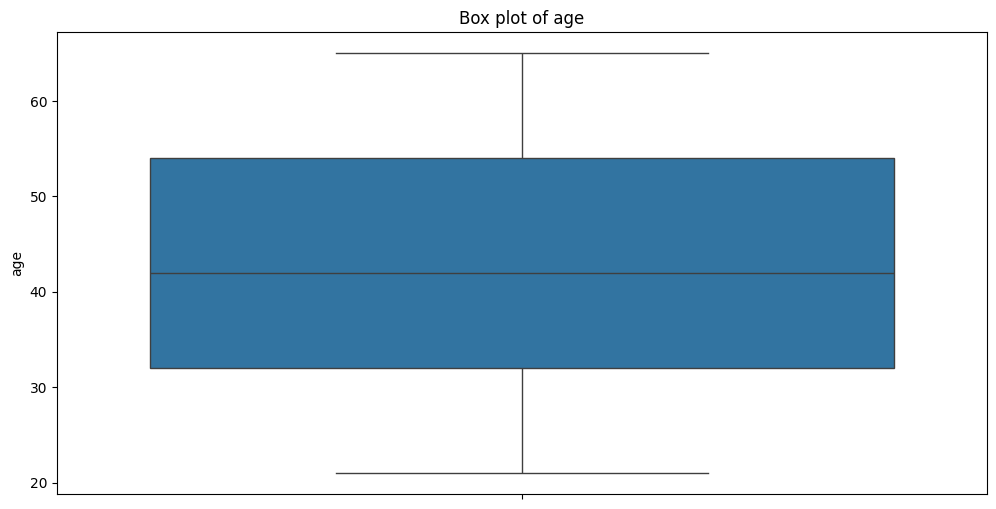

In [ ]:
# Handling Outliers & Outlier treatments
plt.figure(figsize=(12,6))
plt.title("Box plot of age")
ax = sns.boxplot(data=users_df['age'])

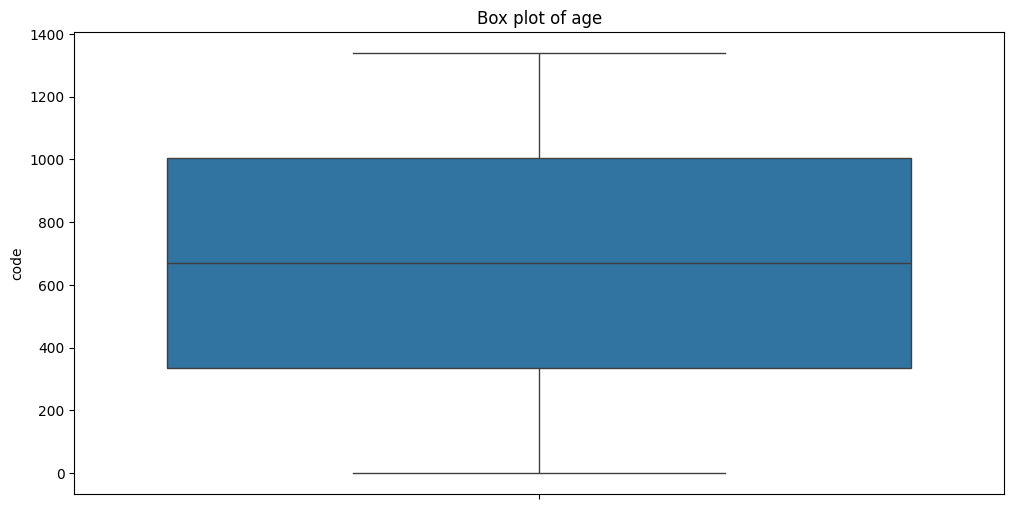

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Box plot of age")
ax = sns.boxplot(data=users_df['code'])

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   code     1340 non-null   int64 
 1   company  1340 non-null   object
 2   name     1340 non-null   object
 3   gender   1340 non-null   object
 4   age      1340 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 52.5+ KB


In [ ]:
users_df.head()

,code,company,name,gender,age
0,0,4You,Roy Braun,male,21
1,1,4You,Joseph Holsten,male,37
2,2,4You,Wilma Mcinnis,female,48
3,3,4You,Paula Daniel,female,23
4,4,4You,Patricia Carson,female,44


In [ ]:
#users_df=users_df[(users_df['gender']=='male') | (users_df['gender']=='female') ]

In [ ]:
users_df['gender'].value_counts()

,count
gender,
male,452
female,448
others,440


In [ ]:
from sentence_transformers import SentenceTransformer
import pandas as pd

# Initialize the SentenceTransformer model
model = SentenceTransformer('flax-sentence-embeddings/all_datasets_v4_MiniLM-L6')

In [ ]:
text_columns = ['name']

for column in text_columns:
    users_df[column + '_embedding'] = users_df[column].apply(lambda text: model.encode(text))

# Concatenate the embeddings into a single feature vector
text_embeddings = users_df[text_columns].values.tolist()

In [ ]:
#  Apply PCA separately to each text embedding column
n_components = 23  # Adjust the number of components as needed
pca = PCA(n_components=n_components)
text_columns = ['name']
# Create an empty array to store the PCA-transformed embeddings
text_embeddings_pca = np.empty((len(users_df), n_components * len(text_columns)))

for i, column in enumerate(text_columns):
    embeddings = users_df[column + '_embedding'].values.tolist()
    embeddings_pca = pca.fit_transform(embeddings)
    text_embeddings_pca[:, i * n_components:(i + 1) * n_components] = embeddings_pca

In [ ]:
users_categorical_data =users_df[['company','gender']]
users_numerical_data = users_df[['code','age']]

In [ ]:
users_categorical_data

,company,gender
0,4You,male
1,4You,male
2,4You,female
3,4You,female
4,4You,female
...,...,...
1335,Umbrella LTDA,male
1336,Umbrella LTDA,female
1337,Umbrella LTDA,male
1338,Umbrella LTDA,female


In [ ]:
le = LabelEncoder()
users_categorical_data = users_categorical_data.apply(LabelEncoder().fit_transform)
users_categorical_data.head()

,company,gender
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [ ]:
users_final_df= pd.concat([users_categorical_data,users_numerical_data], axis=1)

In [ ]:
users_final_df1 = np.hstack((text_embeddings_pca,users_final_df))

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
users_final_df.corr()

,company,gender,code,age
company,1.000000,-0.038401,0.601196,0.010283
gender,-0.038401,1.000000,-0.024700,-0.026727
code,0.601196,-0.024700,1.000000,-0.021087
age,0.010283,-0.026727,-0.021087,1.000000


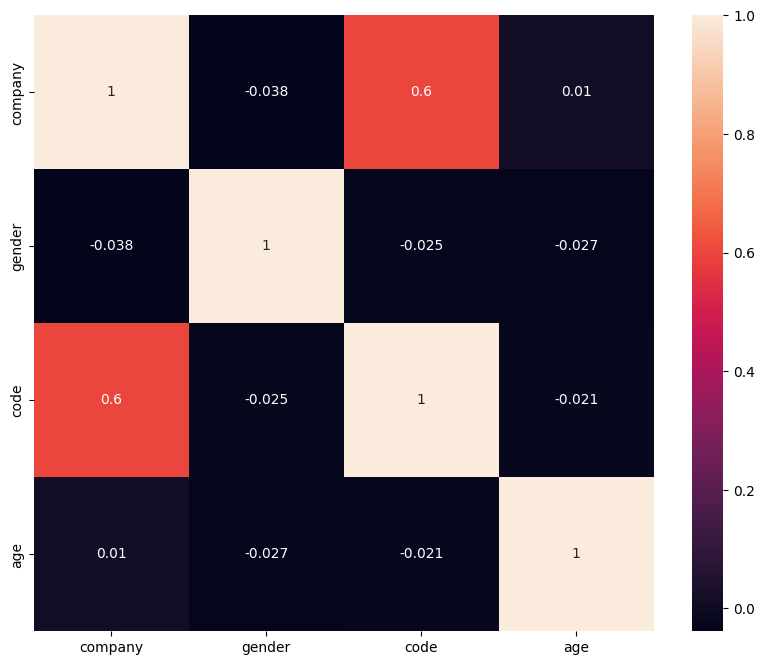

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
plt.figure(figsize=(10,8))
sns.heatmap(users_final_df.corr(), annot=True)
plt.show()

#### 2. Feature Selection

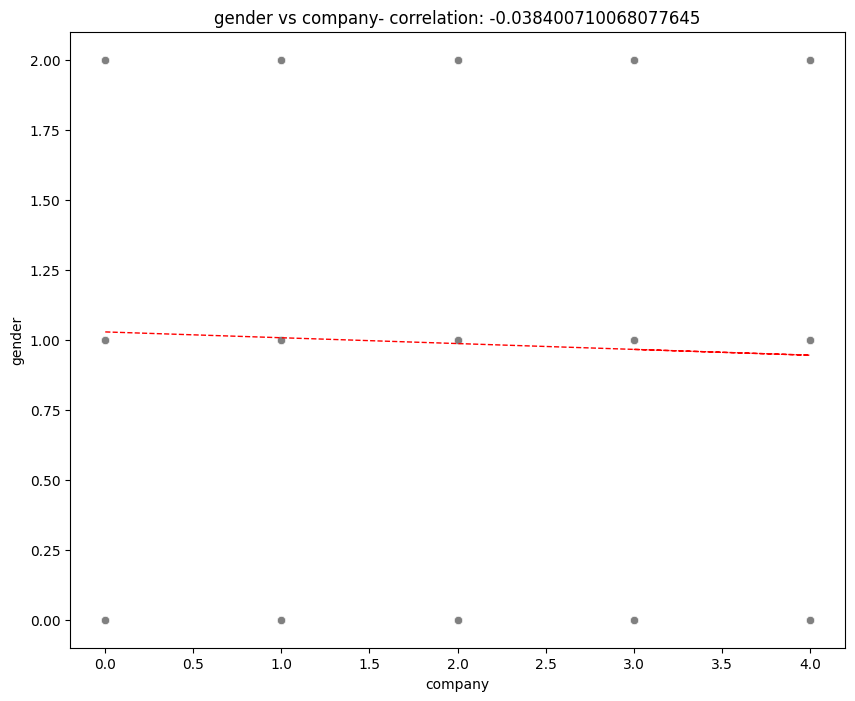

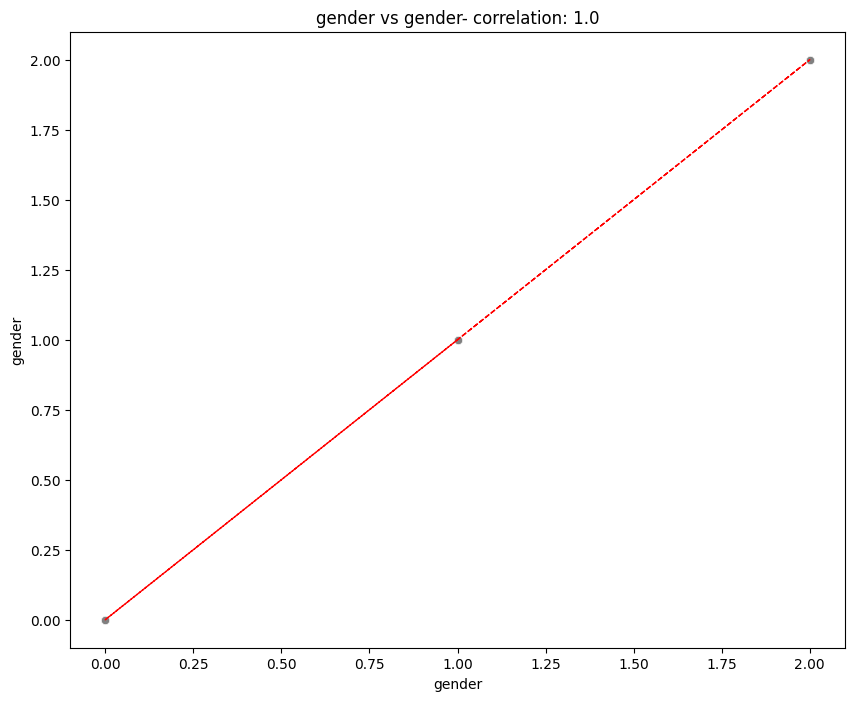

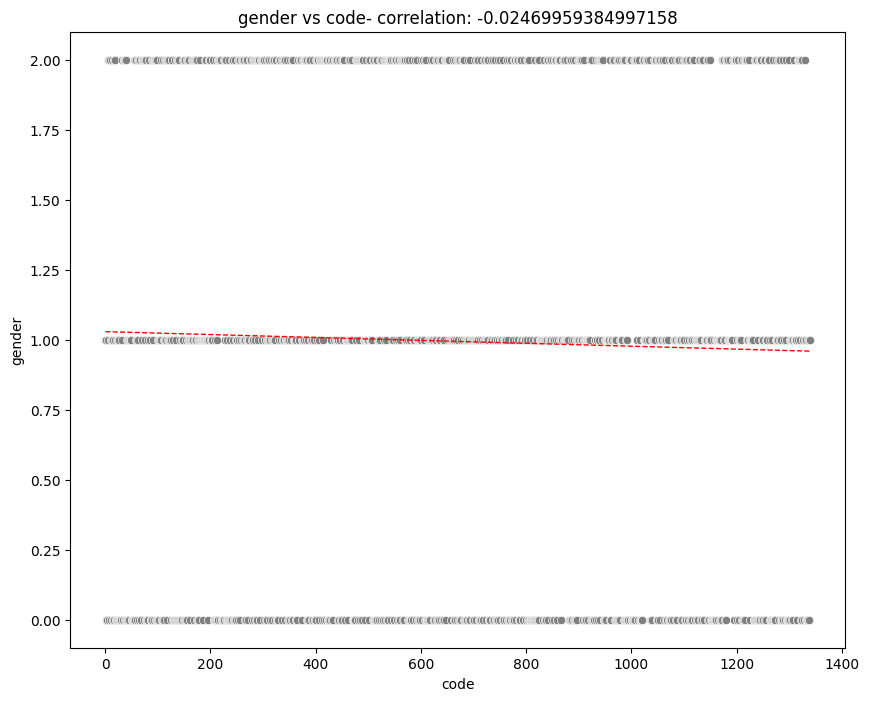

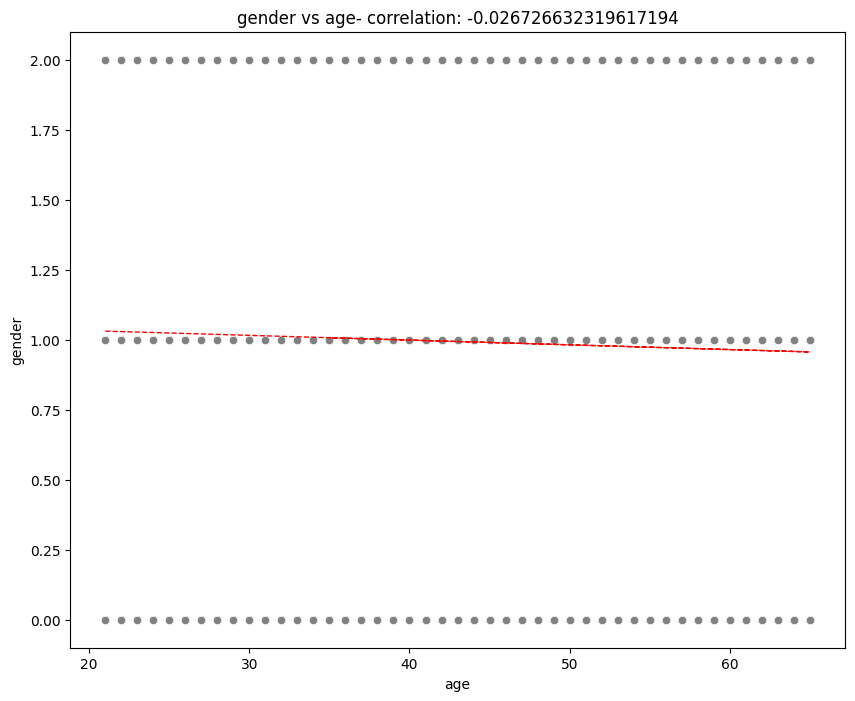

In [ ]:
# Select your features wisely to avoid overfitting
for col in users_final_df.describe().columns.tolist():
    fig = plt.figure(figsize=(10, 8))
    ax = fig.gca()
    feature = users_final_df[col]
    label = users_final_df['gender']
    correlation = feature.corr(label)
    sns.scatterplot(x=feature, y=label, color="gray")
    plt.xlabel(col)
    plt.ylabel('gender')
    ax.set_title('gender vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(users_final_df[col], users_final_df['gender'], 1)
    y_hat = np.poly1d(z)(users_final_df[col])
    plt.plot(users_final_df[col], y_hat, "r--", lw=1)
    plt.show()

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

Before Applying Transformation


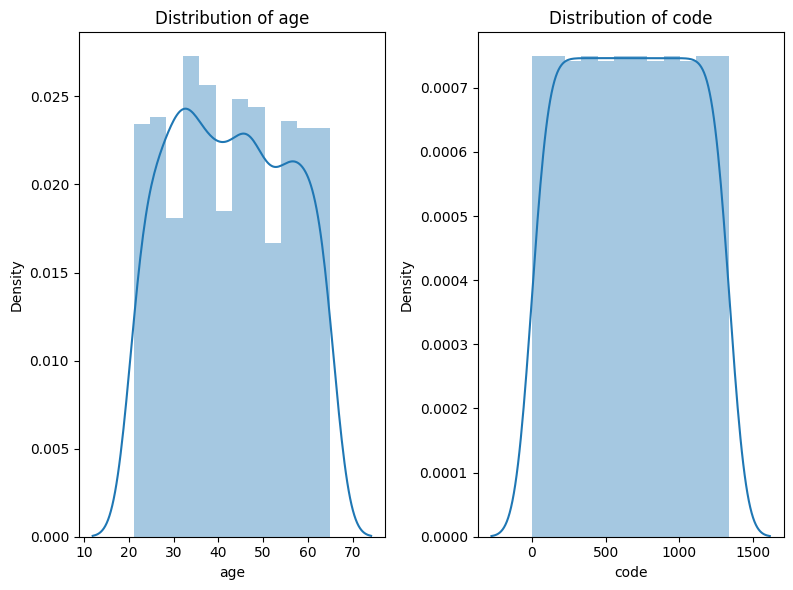

In [ ]:
cont_variables= ["age",'code']
plt.figure(figsize=(20,6))
print("Before Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(users_final_df[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data


### 6. Data Scaling

In [ ]:
# Scaling your data
# Separating "x" and "y" variables
x= np.hstack((text_embeddings_pca,users_final_df))
y= users_final_df[['gender']]
print(x.shape)
print(y.shape)

(1340, 27)
(1340, 1)


In [ ]:
# Creating object
std_regressor= StandardScaler()

# Fit and Transform
x= std_regressor.fit_transform(x)

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Split your data to train and test. Choose Splitting ratio wisely.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(1072, 27)
(268, 27)
(1072, 1)
(268, 1)


##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

Answer Here.

In [ ]:
counts=users_df['gender'].value_counts()
counts

,count
gender,
male,452
female,448
others,440


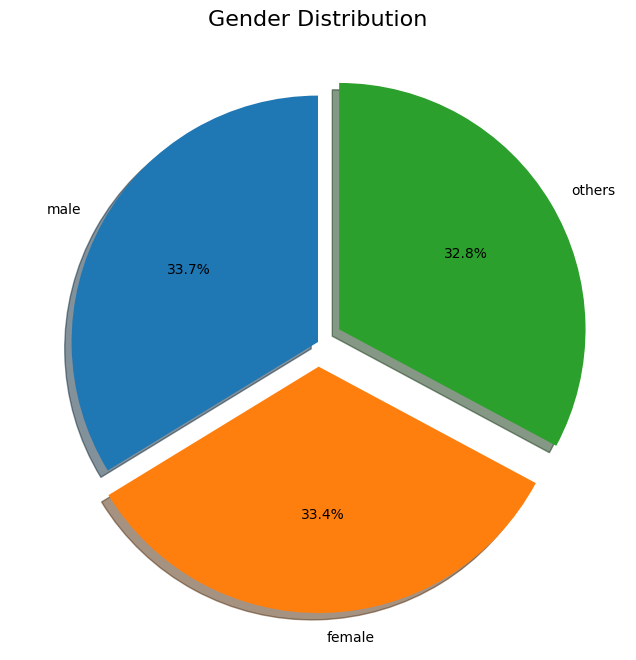

In [ ]:
# Handling Imbalanced Dataset (If needed)
labels = ['male', 'female','others']
plt.figure(figsize=(10,8))
plt.pie(counts, labels=labels, autopct= "%1.1f%%",
        startangle=90, shadow=True, explode=[0,.1,.1])
plt.title('Gender Distribution', fontsize=16)
plt.show()

##### Do you think the dataset is imbalanced? Explain Why.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
def model_metrics(y_train, y_test, train_preds, test_preds):
    # Calculate metrics
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    train_precision = precision_score(y_train, train_preds, average='weighted')  # Specify 'weighted' for multiclass
    test_precision = precision_score(y_test, test_preds, average='weighted')
    train_recall = recall_score(y_train, train_preds, average='weighted')
    test_recall = recall_score(y_test, test_preds, average='weighted')

    print(f"{'Train Accuracy':<20}{train_accuracy:.4f}")
    print(f"{'Test Accuracy':<20}{test_accuracy:.4f}")
    print(f"{'Train Precision':<20}{train_precision:.4f}")
    print(f"{'Test Precision':<20}{test_precision:.4f}")
    print(f"{'Train Recall':<20}{train_recall:.4f}")
    print(f"{'Test Recall':<20}{test_recall:.4f}")
    print("-"*50)

    # Confusion matrices
    train_confusion_matrix = confusion_matrix(y_train, train_preds)
    test_confusion_matrix = confusion_matrix(y_test, test_preds)

    # Plot confusion matrices
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.heatmap(train_confusion_matrix, annot=True, cmap='Blues', ax=axes[0], fmt="d")
    axes[0].set_xlabel('Predicted labels')
    axes[0].set_ylabel('True labels')
    axes[0].set_title('Train Confusion Matrix')
    sns.heatmap(test_confusion_matrix, annot=True, cmap='Blues', ax=axes[1], fmt="d")
    axes[1].set_xlabel('Predicted labels')
    axes[1].set_ylabel('True labels')
    axes[1].set_title('Test Confusion Matrix')

    plt.tight_layout()
    plt.show()

In [ ]:
logistic_classifier= LogisticRegression()
# Fit the Algorithm
logistic_classifier.fit(x_train,y_train)
# Predict on the model
y_train_logistic_pred= logistic_classifier.predict(x_train)
y_test_logistic_pred= logistic_classifier.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Train Accuracy      1.0000
Test Accuracy       0.9963
Train Precision     1.0000
Test Precision      0.9963
Train Recall        1.0000
Test Recall         0.9963
--------------------------------------------------


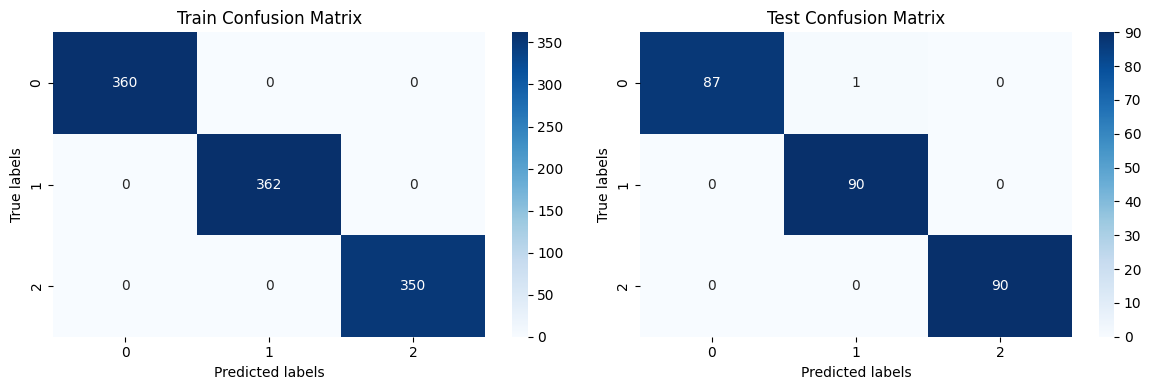

In [ ]:
# Visualizing evaluation Metric Score chart
model_metrics(y_train, y_test, y_train_logistic_pred, y_test_logistic_pred)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import cross_val_score

logistic_regression = LogisticRegression()
# set up the parameter grid for hyperparameter tuning
param_grid = {'penalty': ['l1', 'l2'],
              'C': [0.1, 1.0, 10.0],
              'solver': ['liblinear', 'saga']}
# Fit the Algorithm
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)
grid_search.fit(x_train, y_train)
# get the best hyperparameters and print them
best_params = grid_search.best_params_
print('Best hyperparameters:', best_params)
# use the best hyperparameters to fit the model and make predictions
logistic_regression_best = LogisticRegression(**best_params)
# perform cross-validation on the model with the best hyperparameters
cv_scores = cross_val_score(logistic_regression_best, x_train, y_train, cv=5)
# fit the final model using all the training data and the best hyperparameters
logistic_regression_best.fit(x_train, y_train)
y_train_logistic_pred_cv = logistic_regression_best.predict(x_train)
y_test_logistic_pred_cv  = logistic_regression_best.predict(x_test)
y_score_logistic_pred_cv = logistic_regression_best.predict_proba(x_test)[:, 1]

Best hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}


Train Accuracy      1.0000
Test Accuracy       1.0000
Train Precision     1.0000
Test Precision      1.0000
Train Recall        1.0000
Test Recall         1.0000
--------------------------------------------------


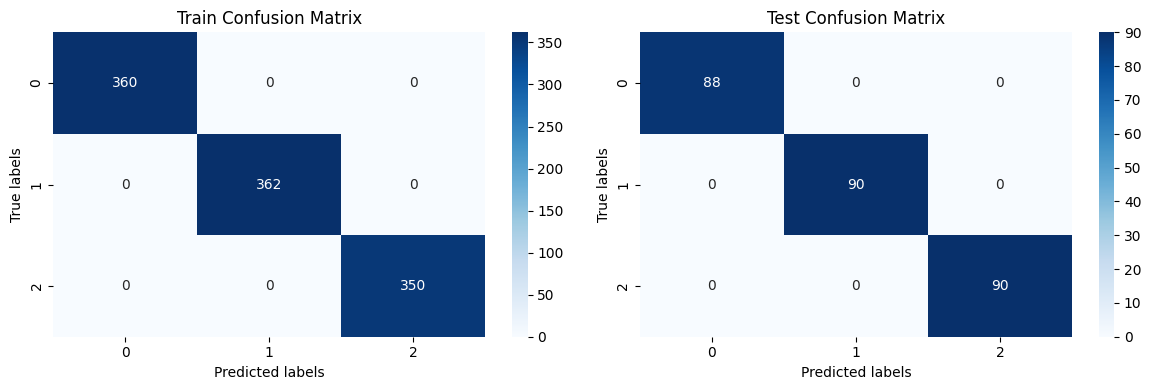

In [ ]:
model_metrics(y_train, y_test, y_train_logistic_pred_cv, y_test_logistic_pred_cv)

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

In [ ]:
# ML Model - 2  Implementation
random_forest = RandomForestClassifier(n_estimators=100, max_depth=4, min_samples_split=4, min_samples_leaf=1)

# Fit the Algorithm
random_forest.fit(x_train, y_train)

# Predict on the model
y_train_rf_pred = random_forest.predict(x_train)
y_test_rf_pred = random_forest.predict(x_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Train Accuracy      0.9991
Test Accuracy       0.9888
Train Precision     0.9991
Test Precision      0.9889
Train Recall        0.9991
Test Recall         0.9888
--------------------------------------------------


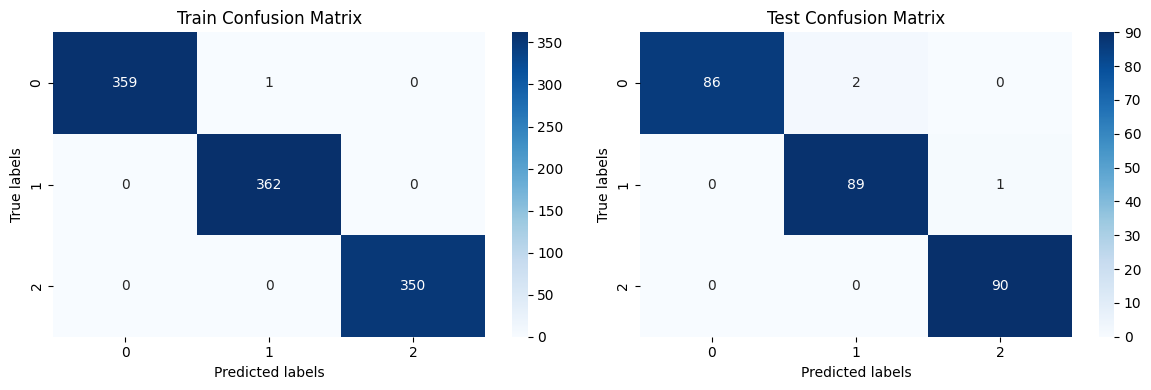

In [ ]:
# Visualizing evaluation Metric Score chart
model_metrics(y_train, y_test, y_train_rf_pred, y_test_rf_pred)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
random_forest = RandomForestClassifier()
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [3,4,5, 10, 15, None],
              'min_samples_split': [3,4, 5, 10],
              'min_samples_leaf': [2,3, 4]}
# Fit the Algorithm
grid_search = GridSearchCV(random_forest, param_grid, cv=5)
grid_search.fit(x_train, y_train)
# get the best hyperparameters and print them
best_params = grid_search.best_params_
print('Best hyperparameters:', best_params)
# use the best hyperparameters to fit the model to the training data
random_forest_best = RandomForestClassifier(**best_params)
random_forest_best.fit(x_train, y_train)
# Predict on the model
y_train_rf_pred_gs = random_forest_best.predict(x_train)
y_test_rf_pred_gs  = random_forest_best.predict(x_test)
y_score_rf_pred_gs = random_forest_best.predict_proba(x_test)[:, 1]

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 100}


Train Accuracy      1.0000
Test Accuracy       1.0000
Train Precision     1.0000
Test Precision      1.0000
Train Recall        1.0000
Test Recall         1.0000
--------------------------------------------------


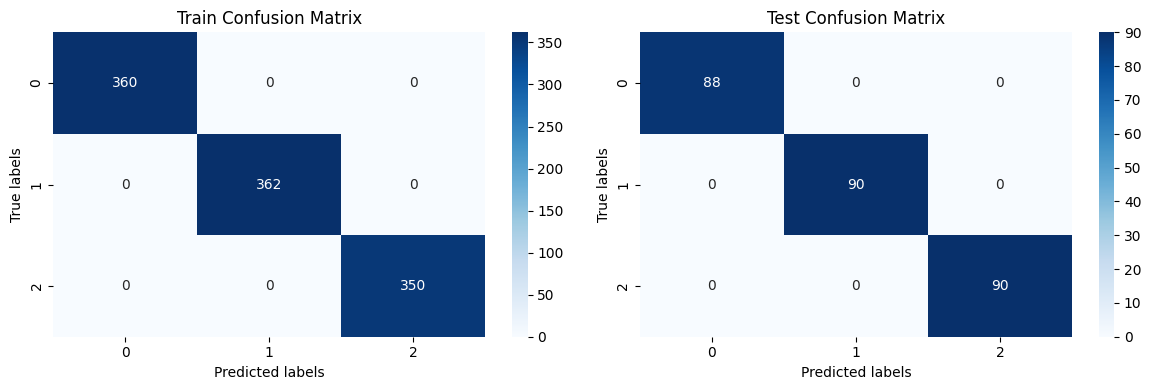

In [ ]:
# Visualizing evaluation Metric Score chart
model_metrics(y_train, y_test, y_train_rf_pred_gs, y_test_rf_pred_gs)

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
xgb = XGBClassifier()
# Fit the Algorithm
xgb.fit(x_train, y_train)
# Predict on the model
y_train_xgb_pred = xgb.predict(x_train)
y_test_xgb_pred = xgb.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Train Accuracy      1.0000
Test Accuracy       1.0000
Train Precision     1.0000
Test Precision      1.0000
Train Recall        1.0000
Test Recall         1.0000
--------------------------------------------------


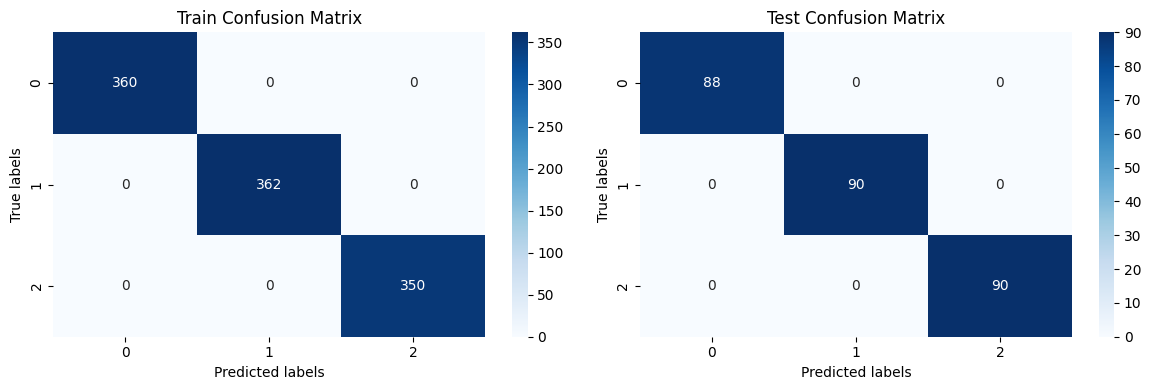

In [ ]:
# Visualizing evaluation Metric Score chart
model_metrics(y_train, y_test, y_train_xgb_pred, y_test_xgb_pred)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# set up the parameter grid for hyperparameter tuning
param_grid = {'max_depth': [3, 5, 7],
              'learning_rate': [0.01, 0.1, 0.3],
              'n_estimators': [50, 100, 200]}
# Fit the Algorithm
grid_search = GridSearchCV(xgb, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)
# print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)
# Predict on the model
best_estimator = grid_search.best_estimator_
y_train_xgb_pred_gs = best_estimator.predict(x_train)
y_test_xgb_pred_gs  = best_estimator.predict(x_test)
y_score_xgb_pred_gs = best_estimator.predict_proba(x_test)[:, 1]

Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}


Train Accuracy      1.0000
Test Accuracy       1.0000
Train Precision     1.0000
Test Precision      1.0000
Train Recall        1.0000
Test Recall         1.0000
--------------------------------------------------


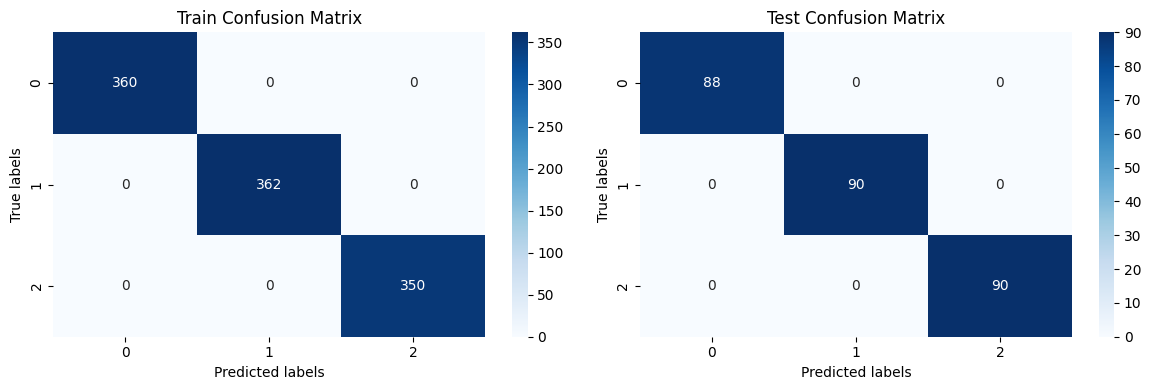

In [ ]:
# Visualizing evaluation Metric Score chart
model_metrics(y_train, y_test, y_train_xgb_pred_gs, y_test_xgb_pred_gs)

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

In [ ]:
# ML Model - 4 Implementation
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the Algorithm
knn.fit(x_train, y_train)

# Predict on the model
y_train_knn_pred = knn.predict(x_train)
y_test_knn_pred = knn.predict(x_test)

Train Accuracy      0.8927
Test Accuracy       0.7873
Train Precision     0.8963
Test Precision      0.8022
Train Recall        0.8927
Test Recall         0.7873
--------------------------------------------------


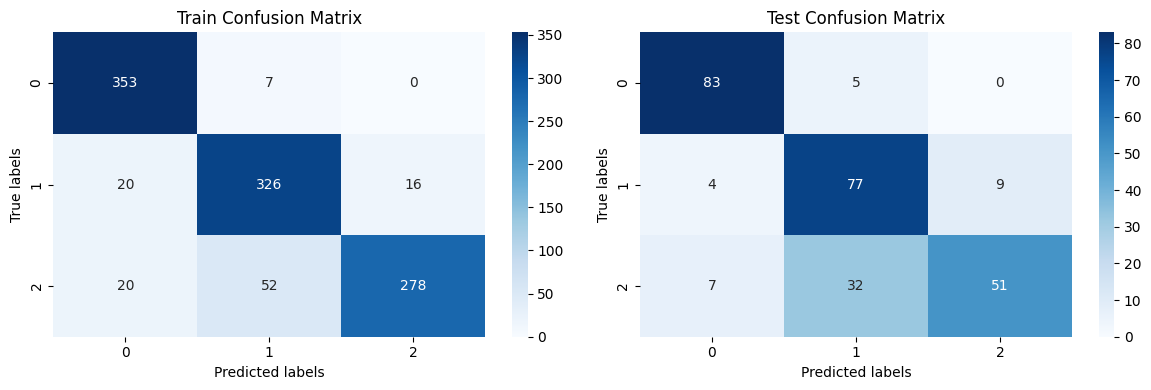

In [ ]:
# Visualizing evaluation Metric Score chart
model_metrics(y_train, y_test, y_train_knn_pred, y_test_knn_pred)

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***